In [20]:
import numpy as np
import pandas as pd
from os.path import join as oj
import os
import pandas as pd
import sys
import inspect
import datetime
from scipy.stats import percentileofscore
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.append(parentdir)
sys.path.append(parentdir + '/modeling')
import load_data
from fit_and_predict import add_preds
from functions import merge_data
from viz import  viz_interactive
import numpy as np
import pandas as pd
from os.path import join as oj
import os
import pandas as pd
import sys
import matplotlib as plt
from scipy.stats import percentileofscore
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm

# CHANGE THIS
from exponential_modeling import *
from fit_and_predict import *
#from pmdl_weights import * 

from shared_models import SharedModel


In [ ]:
# Load in the Data
# Imputting data for 23rd of May as 13 cases
print('loading data...')
NUM_DAYS_LIST = [1, 2, 3, 4, 5, 6, 7]
df_county = load_data.load_county_level(data_dir=oj(parentdir, 'data'))
#df_county = add_preds(df_county, NUM_DAYS_LIST=NUM_DAYS_LIST,
#                          cached_dir=oj(parentdir, 'data'))

loading data...
loading county-level data...


In [9]:
# Currently selecting confirmed cases, can look at probable later
df_ucsf = pd.read_csv("../../covid-19-private-data/ucsf_hospitalization_data.csv", sep="\t")
df_ucsf = df_ucsf[["Date", "ZSFG COVID-19+ (total admitted)"]]
df_ucsf = df_ucsf.rename(columns={"ZSFG COVID-19+ (total admitted)": "hospitalizations"})
df_ucsf_hosp = df_ucsf["hospitalizations"] 
UCSF_data = np.array(df_ucsf_hosp.to_numpy())
UCSF_data = UCSF_data[:54]
UCSF_data
#UCSF_data = UCSF_data.reshape(1,UCSF_data.shape[0])
#df_shared_UCSF.head()
#print(UCSF_data[40])

array([ 0,  0,  1,  1,  0,  0,  0,  0,  1,  3,  2,  1,  0,  1,  2,  2,  4,
        7,  7,  7,  9, 13, 15, 16, 18, 21, 23, 22, 25, 27, 30, 30, 30, 32,
       31, 33, 34, 28, 25, 25, 27, 25, 24, 26, 25, 26, 25, 23, 18, 19, 19,
       22, 24, 25])

## Eval Mode for Linear,Exponential, and Shared Exponential

In [43]:
#Linear,Exponential,Shared_Exponential Eval Mode for UCSF Data
eval_start_day = 20;
lin_predictions = []
exp_predictions = []
shared_exp_predictions = []
for i in range(eval_start_day,UCSF_data.shape[0]):   
    tmp = UCSF_data[:i+1]
    d = {'Name':['UCSF'],'hospitalizations':[tmp]}
    df_shared_UCSF = pd.DataFrame(data = d)
    shared_pred = fit_and_predict_shared_exponential(df_shared_UCSF,mode = "eval_mode",outcome = "hospitalizations")
    shared_exp_predictions.append(shared_pred[0][0])
    tmp = tmp.reshape(1,tmp.shape[0])
    lin_pred = linear_fit(tmp,'eval_mode')
    lin_predictions.append(lin_pred[0][0])
    exp_pred = exponential_fit(tmp,'eval_mode')
    exp_predictions.append(exp_pred[0][0])
   

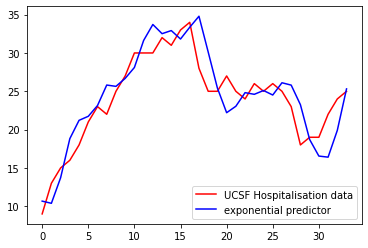

In [9]:
plt.plot(UCSF_data[eval_start_day:],'r',label='UCSF Hospitalisation data')
plt.plot(exp_predictions,'b',label='exponential predictor')
plt.legend()

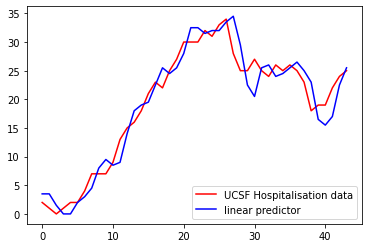

In [591]:
plt.plot(UCSF_data[eval_start_day:],'r',label='UCSF Hospitalisation data')
plt.plot(lin_predictions,'b',label='linear predictor')
plt.legend()


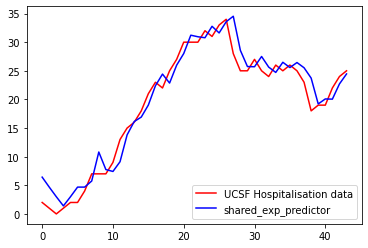

In [593]:
plt.plot(UCSF_data[eval_start_day:],'r',label='UCSF Hospitalisation data')
plt.plot(shared_exp_predictions,'b',label='shared_exp_predictor')
plt.legend()

## Defining Start Day and k

In [123]:
start_day = 20 # start_day >= 1; the index that we're predicting on
k = 7 #Number of days we want to predict ahead

## Baseline Performance 

Text(0.5, 1.0, '7-day ahead prediction for baseline predictor')

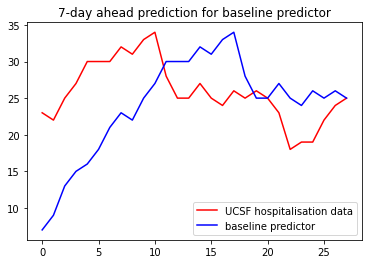

In [130]:
baseline_prediction = []
moving_average = []
for i in range(start_day,54 - k + 1):
    baseline_prediction.append(UCSF_data[i-1])
    moving_average.append(np.mean(UCSF_data[i-5:i]))
    
#print(len(baseline_prediction))
plt.plot(UCSF_data[start_day+k-1:54],'r',label = "UCSF hospitalisation data")
plt.plot(baseline_prediction,'b',label = "baseline predictor")
plt.legend()
plt.title(str(k)+"-day ahead prediction for baseline predictor")
#print(mean_absolute_error(baseline_prediction,UCSF_data[start_day+k-1:]))

28


TypeError: title() missing 1 required positional argument: 'label'

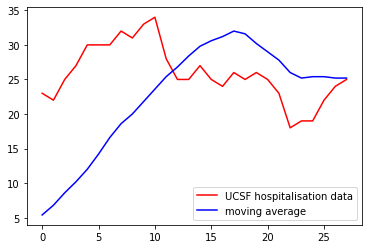

In [133]:
print(len(moving_average))
print
#print(mean_absolute_error(moving_average,UCSF_data[start_day+k-1:]))
plt.plot(UCSF_data[start_day+k-1:54],'r',label = "UCSF hospitalisation data")
plt.plot(moving_average,'b',label = "moving average")
plt.legend()
plt.title()

## Future Predictions for Linear,Exponential, and Shared Exponential

In [117]:
lin_future_predictions = []
exp_future_predictions = []
shared_exp_future_predictions = []
for i in range(start_day,UCSF_data.shape[0]-k + 1):
    tmp = UCSF_data[:i] # Should there be an i+1 for predict_future? No
    d = {'Name':['UCSF'],'hospitalizations':[tmp]}
    df_shared_UCSF = pd.DataFrame(data = d)
    shared_future_pred = fit_and_predict_shared_exponential(df_shared_UCSF,mode = "predict_future",outcome = "hospitalizations",demographic_vars=[],target_day=np.array([k]), verbose=False)
    shared_exp_future_predictions.append(shared_future_pred[0][0])
    tmp = tmp.reshape(1,tmp.shape[0])
    lin_pred_future = linear_fit(tmp,'predict_future',target_day=np.array([k]))
    exp_pred_future = exponential_fit(tmp,'predict_future',target_day=np.array([k]))
    lin_future_predictions.append(lin_pred_future[0][0])
    exp_future_predictions.append(exp_pred_future[0][0])


7.147222290870898


Text(0.5, 1.0, '7-day ahead prediction for shared exponential predictor')

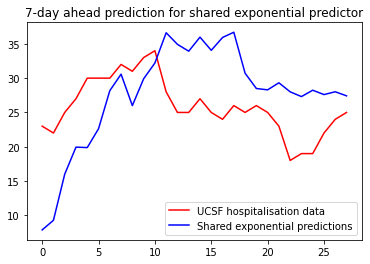

In [77]:
print(mean_absolute_error(shared_exp_future_predictions,UCSF_data[start_day+k-1:]))
plt.plot(UCSF_data[start_day+k-1:],'r',label = "UCSF hospitalisation data")
plt.plot(shared_exp_future_predictions,'b',label= "Shared exponential predictions")
plt.legend()
plt.title(str(k)+"-day ahead prediction for shared exponential predictor")


7.728571428571428


Text(0.5, 1.0, '7-day ahead prediction for linear predictior')

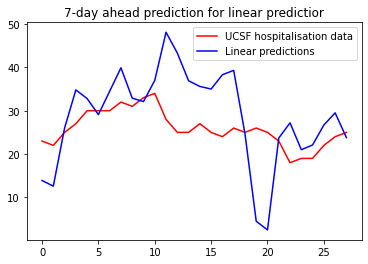

In [79]:
print(mean_absolute_error(lin_future_predictions,UCSF_data[start_day+k-1:]))
plt.plot(UCSF_data[start_day+k-1:],'r',label = "UCSF hospitalisation data")
plt.plot(lin_future_predictions,'b',label= "Linear predictions")
plt.legend()
plt.title(str(k)+"-day ahead prediction for linear predictior")

13.550558415765389


Text(0.5, 1.0, '7-day ahead prediction for exponential predictior')

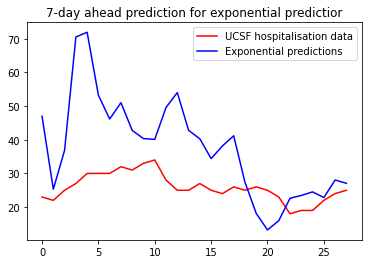

In [80]:
print(mean_absolute_error(exp_future_predictions,UCSF_data[start_day+k-1:]))
plt.plot(UCSF_data[start_day+k-1:],'r',label = "UCSF hospitalisation data")
plt.plot(exp_future_predictions,'b',label= "Exponential predictions")
plt.legend()
plt.title(str(k)+"-day ahead prediction for exponential predictior")

In [72]:
#df_CA = df_county[df_county['StateName']=='CA']
# df_CA.head()

#len(df_CA['deaths'].iloc[0])
# County data start date: 1/22/20
# print(df_county.columns.values)
# UCSF data start date: 3/8/20
# UCSF first date with 3+ hospitalizations: 3/17/20, 10 days after UCSF start
# print(df_ucsf)

In [73]:
# Start predicting from 3/8/20 onwards
# 46 days from the 1/22/20 to 3/8/20, not including the end date
# UCSF first prediction is: 3/12/20 

# death_preds = []
# for day in range(#edit date range):
#     df_CA_test = df_CA.copy(deep=True)
#     #append preds to death_preds
#     fit_and_predict_ensemble(df_CA_test)['predicted_deaths_ensemble_1']
#     for county in range(len(df_CA)):
#             # do we need to remove columns and truncate counts??
#             # truncate list counts: deaths, cases, neighbor_deaths, neighbor_cases
#             for col in ['deaths', 'cases', 'neighbor_deaths', 'neighbor_cases']:
#                 df_CA_test[col].iloc[county] = df_CA_test[col].iloc[county][:day]


In [74]:
#  Why are we starting from 56?
# print(df_CA[df_CA['CountyName']=='San Francisco']['deaths'].values[0][56:])
# df_CA['deaths']

## Imputing Deaths 

$hospitalizations_{t} = \beta_0 hospitalizations_{t-1} + \beta_1 imputed\ deaths_{t} + \beta_2 imputed\ deaths_{t-1}$


In [182]:
shifted_date = 50 # 50 days between 1/22 and 3/12
cen = 4 # Number of days to censor on left + 1

In [195]:
# Calculate df_CA
df_CA = df_county[df_county['StateName'].isin(['CA', "WA"])]

# Compute the Imputed Deaths
# lin_impu_future_predictions = []
# exp_impu_future_predictions = []
# shared_impu_exp_future_predictions = []
## Censoring the UCSF_data

UCSF_cen = UCSF_data[cen:]
imputed_deaths = []

## Q: Should beginning of the range be 0 or the start_day?
## Q: Should we include this k? 
## A: I hate time series...
for i in range(1,UCSF_cen.shape[0]-k + 1): 
    df_CA_test = df_CA.copy(deep=True)
    # Calculate the Imputed Deaths
    for county in range(len(df_CA_test)):
            # do we need to remove columns and truncate counts??
            # truncate list counts: deaths, cases, neighbor_deaths, neighbor_cases
            for col in ['deaths', 'cases', 'neighbor_deaths', 'neighbor_cases']:
                # adding 1 to predict t
                df_CA_test[col].iloc[county] = df_CA_test[col].iloc[county][:shifted_date + i] 
    
    tmp = fit_and_predict_ensemble(df_CA_test, target_day=np.array([k]))
    sf_dop = tmp[tmp["CountyName"] == "San Francisco"]
    imputed_deaths.append(np.array(sf_dop["predicted_deaths_ensemble_" + str(k)])[0][0])

imputed_deaths = np.array(imputed_deaths)

In [196]:
# Should be a difference of k
print(len(imputed_deaths), UCSF_cen.shape)

47 (50,)


In [197]:
preds = []

for i in range(start_day,UCSF_cen.shape[0]-k + 1): 
    
    # Calculate the Imputed Deaths
    tmp = UCSF_cen[:i] # day t-1
    deaths = imputed_deaths[:i] # day t
    
    assert len(tmp) == len(deaths) 
    
    d = {'Name':['UCSF'],'hospitalizations':[tmp], "imputed_deaths": [deaths]}
    df_shared_UCSF = pd.DataFrame(data = d)
    
    # Feature Transforms
    feat_transforms = {}
    feat_transforms["hospitalizations"] = [lambda x: np.log(x+1)]
    feat_transforms["imputed_deaths"] = [lambda x: np.log(x + 1)]
    
    # Auxiliary Time Variables
    aux_vars = ["imputed_deaths"]
    shared_model = SharedModel(df_shared_UCSF,mode = "predict_future",
                                                            outcome = "hospitalizations",
                                                            demographic_variables=[],
                                                            auxiliary_time_features=aux_vars,
                                                            target_days=np.array([k]), 
                                                            feat_transforms=feat_transforms,
                                                            time_series_default_values = 0,
                                                            scale=False)
    
    
    shared_model.create_dataset()
    shared_model.fit_model()
    shared_model.predict()
    
    preds.append(shared_model.predictions[0][0])
    

Text(0.5, 1.0, '3-day ahead prediction for shared exponential model w/ Imputed Deaths ')

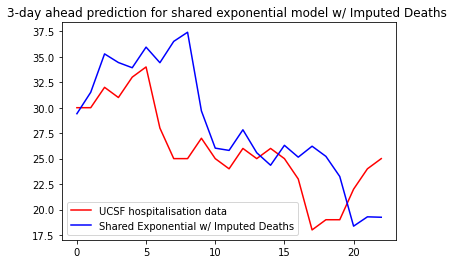

In [198]:
plt.plot(UCSF_cen[start_day+k-1:],'r',label = "UCSF hospitalisation data")
plt.plot(np.array(preds),'b',label= "Shared Exponential w/ Imputed Deaths")
# plt.plot(shared_exp_future_predictions[cen:],'orange',label= "future shared exponential predictions")
plt.legend()
plt.title(str(k)+"-day ahead prediction for shared exponential model w/ Imputed Deaths ")

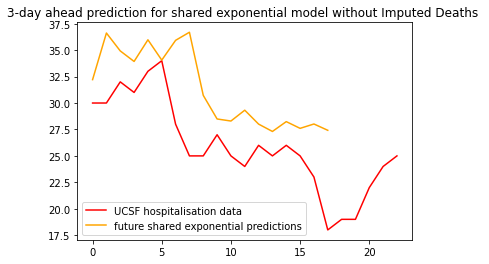

In [199]:
plt.plot(UCSF_cen[start_day+k-1:],'r',label = "UCSF hospitalisation data")
plt.plot(shared_exp_future_predictions[cen:],'orange',label= "future shared exponential predictions")
plt.title(str(k)+"-day ahead prediction for shared exponential model without Imputed Deaths ")
plt.legend()

## Cummulative Sum


In [101]:
# This is a cummulative sum
UCSF_transf = np.cumsum(UCSF_data)
lin_cum_future_predictions = []
exp_cum_future_predictions = []
shared_cum_exp_future_predictions = []
for i in range(start_day,UCSF_transf.shape[0]-k + 1):
    tmp = UCSF_transf[:i] # Should there be an i+1 for predict_future? No
    d = {'Name':['UCSF'],'hospitalizations':[tmp]}
    df_shared_UCSF = pd.DataFrame(data = d)
    
    shared_cum_future_pred = fit_and_predict_shared_exponential(df_shared_UCSF,mode = "predict_future",outcome = "hospitalizations",demographic_vars=[],target_day=np.array([k]), verbose=False)
    shared_cum_exp_future_predictions.append(shared_future_pred[0][0])
    tmp = tmp.reshape(1,tmp.shape[0])
    
    lin_cum_pred_future = linear_fit(tmp,'predict_future',target_day=np.array([k]))
    exp_cum_pred_future = exponential_fit(tmp,'predict_future',target_day=np.array([k]))
    lin_cum_future_predictions.append(lin_cum_pred_future[0][0])
    exp_cum_future_predictions.append(exp_cum_pred_future[0][0])

Text(0.5, 1.0, '3-day ahead prediction for linear predictor for cumulative sum')

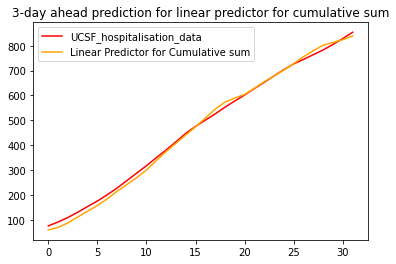

In [1026]:
plt.plot(UCSF_transf[start_day+k-1:],'r',label = "UCSF_hospitalisation_data")
plt.plot(lin_cum_future_predictions,'orange',label= "Linear Predictor for Cumulative sum")
plt.legend()
plt.title(str(k)+"-day ahead prediction for linear predictor for cumulative sum")

In [943]:
x = np.array(lin_future_predictions)
x[1:] -= x[:-1].copy()

Text(0.5, 1.0, '3-day ahead prediction for linear predictor based on cumulative sum')

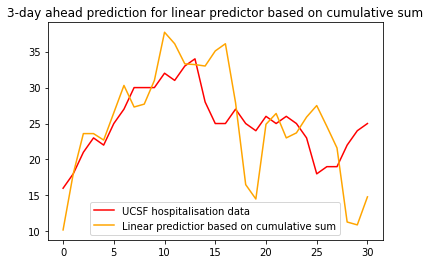

In [1027]:
plt.plot(UCSF_data[start_day+k:],'r',label = "UCSF hospitalisation data")
plt.plot(x[1:],'orange',label= "Linear predictior based on cumulative sum")
plt.legend()
plt.title(str(k)+"-day ahead prediction for linear predictor based on cumulative sum")

Text(0.5, 1.0, '3-day ahead prediction for linear predictor')

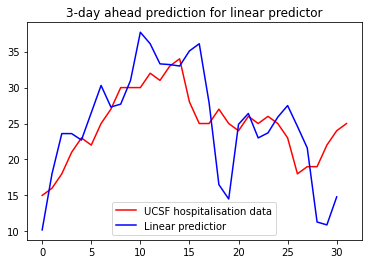

In [1029]:
plt.plot(UCSF_data[start_day+k-1:],'r',label = "UCSF hospitalisation data")
plt.plot(lin_future_predictions[1:],'b',label= "Linear predictior")
plt.legend()
plt.title(str(k)+"-day ahead prediction for linear predictor")

## Ensemble Modeling

In [118]:
ensemble = []
for i in range(start_day,UCSF_data.shape[0]-k+1): 
    tmp = UCSF_data[:i]
    d = {'Name':['UCSF'],'hospitalizations':[tmp]}
    df_shared_UCSF = pd.DataFrame(data = d)
    ensemble_future_prediction = fit_and_predict_ensemble(df_shared_UCSF,target_day = np.array([k]),outcome = 'hospitalizations', 
      methods = [shared_exponential,linear],mode = 'predict_future', verbose = False)['predicted_hospitalizations_ensemble_'+str(k)].values[0][0]
    ensemble.append(ensemble_future_prediction)

#print(ensemble)
#print(UCSF_data[:start_day+k-1])
print(mean_absolute_error(ensemble,UCSF_data[start_day+k-1:]))
#print(mean_absolute_error(shared_exp_future_predictions,UCSF_data[start_day+k-1:]))
#ensemble_prediction.head()


6.495960912830403


Text(0.5, 1.0, '7-day ahead prediction for Ensemble  ')

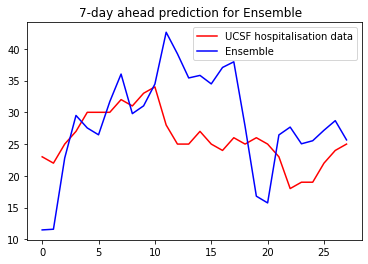

In [83]:
plt.plot(UCSF_data[start_day+k-1:],'r',label = "UCSF hospitalisation data")
plt.plot(ensemble,'b',label= "Ensemble")
#plt.plot(shared_exp_future_predictions,'orange',label = "Shared Exponential")
# plt.plot(shared_exp_future_predictions[cen:],'orange',label= "future shared exponential predictions")
plt.legend()
plt.title(str(k)+"-day ahead prediction for Ensemble  ")

## Smoothing Methods

3.9367541800213712


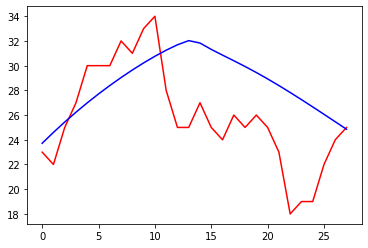

In [119]:
lowess = sm.nonparametric.lowess
smoothed_ensemble = lowess(np.array(ensemble),range(0,len(ensemble)),frac = 1,it = 1, delta = 0.0, is_sorted = False)[:,1]
print(mean_absolute_error(smoothed_ensemble,UCSF_data[start_day+k-1:]))
plt.plot(UCSF_data[start_day+k-1:],'r',label = "UCSF hospitalisation data")
plt.plot(smoothed_ensemble,'b',label= "Smoothed Ensemble")


## MEPI

In [355]:
def mepi_shared(start_t,shared_k_day_ahead):
    delta_shared = []
    for counter in range(0,3): 
        temp = UCSF_data[:start_t-k-counter]
        d = {'Name':['UCSF'],'hospitalizations':[temp]}
        df_shared_UCSF = pd.DataFrame(data = d)
        shared_predictor = fit_and_predict_shared_exponential(df_shared_UCSF,mode = "predict_future",outcome = "hospitalizations",
                             demographic_vars=[],target_day=np.array([k]), verbose=False)[0][0]
        delta_shared.append(abs(shared_predictor-UCSF_data[start_t-counter-1])/abs(shared_predictor))
    delta_shared_max = max(delta_shared)
    #lower_shared_bound = -shared_k_day_ahead*delta_shared_max
    upper_shared_bound = shared_k_day_ahead*delta_shared_max
    return upper_shared_bound 
    #PI_shared = [lower_shared_bound,upper_shared_bound]
    #print(PI_shared)
    #return PI_shared

In [357]:
def mepi_ensemble(start_t,k_day_ahead): 
    delta_ensemble = []
    for counter in range(0,5): 
        temp = UCSF_data[:start_t-k-counter]
        d = {'Name':['UCSF'],'hospitalizations':[temp]}
        df_shared_UCSF = pd.DataFrame(data = d)
        ensemble_prediction = fit_and_predict_ensemble(df_shared_UCSF,target_day = np.array([k]),outcome = 'hospitalizations', 
      methods = [shared_exponential,linear],mode = 'predict_future', verbose = False)['predicted_hospitalizations_ensemble_'+str(k)].values[0][0]
        delta_ensemble.append(abs(ensemble_prediction-UCSF_data[start_t-counter-1])/abs(ensemble_prediction))
    delta_ensemble_max = max(delta_ensemble)
    lower_ensemble_bound = -k_day_ahead*(1-delta_ensemble_max)+k_day_ahead
    upper_ensemble_bound = k_day_ahead*(1+delta_ensemble_max) - k_day_ahead
    PI_ensemble = [lower_ensemble_bound,upper_ensemble_bound]
    return PI_ensemble

In [359]:
shared_PI = []
ensemble_PI = []
for j in range(start_day,UCSF_data.shape[0]-k + 1):
    tmp = UCSF_data[:j] # Q: Should there be a j+1 for predict_future? A: No
    d = {'Name':['UCSF'],'hospitalizations':[tmp]}
    df_shared_UCSF = pd.DataFrame(data = d)
    shared_k_day_ahead = fit_and_predict_shared_exponential(df_shared_UCSF,mode = "predict_future",outcome = "hospitalizations",
                                                          demographic_vars=[],target_day=np.array([k]), verbose=False)[0][0]
    #ensemble_k_day_ahead = fit_and_predict_ensemble(df_shared_UCSF,target_day = np.array([k]),outcome = 'hospitalizations', 
        #methods = [shared_exponential,linear],mode = 'predict_future', verbose = False)['predicted_hospitalizations_ensemble_'+str(k)].values[0][0]
    shared_PI.append(mepi_shared(j,shared_k_day_ahead))
    #ensemble_PI.append(mepi_ensemble(j,ensemble_k_day_ahead))
print(shared_PI)

[7.117782090869791, 8.401590205628226, 14.14857155442987, 16.826153685328354, 16.27655506777812, 28.193552556774545, 34.49864430042258, 37.4283331674195, 31.98657636760458, 13.709315790986517, 9.294104734804934, 10.494628455684758, 8.081246817453488, 6.226147857644754, 6.605908027549656, 6.285809988839093, 3.770994307456862, 2.2068803733691973, 4.669504244121972, 8.032690310279623, 7.98794802561211, 8.33699849828218, 8.45862442521037, 8.2272733786579, 8.576017245717667, 5.573527033270056, 2.767116604797862, 2.700147864861801, 3.5664665556326915, 8.013942573075054]


Text(0.5, 1.0, '5-day ahead prediction for UCSF-hospitilisation ')

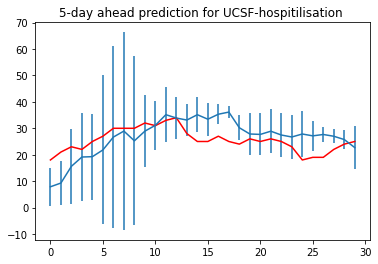

In [360]:
#shared_PI = np.array(shared_PI).reshape(2,UCSF_data[start_day+k-1:].shape[0])
fig1, (ax1) = plt.subplots(1,1)
ax1.plot(UCSF_data[start_day+k-1:],'r',label = "UCSF hospitalisation data")
ax1.errorbar(list(range(0,len(shared_exp_future_predictions))),shared_exp_future_predictions,yerr = shared_PI,label = "shared exponential predictor" )
#ax1.fill_between(list(range(0,len(shared_exp_future_predictions)),shared_exp_future_predictions-1,shared_exp_future_predictions+1,color='b', alpha=.1)
#)
ax1.set_title(str(k)+"-day ahead prediction for UCSF-hospitilisation ")
#ax1.legend()

#ax2.plot(UCSF_data[start_day+k-1:],'r',label = "UCSF hospitalisation data")
#ax2.plot(shared_exp_future_predictions,'b',label= "Shared exponential predictions")

ValueError: The lengths of the data (30) and the error 0 do not match

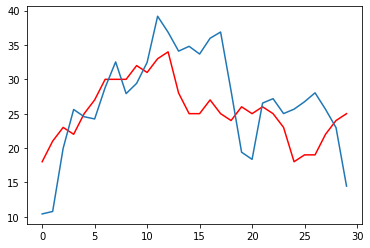

In [278]:
ensemble_PI = np.array(ensemble_PI).reshape(2,len(ensemble_PI))
plt.plot(UCSF_data[start_day+k-1:],'r',label = "UCSF hospitalisation data")
plt.errorbar(list(range(0,len(ensemble))),ensemble,yerr = ensemble_PI,label = "Ensemble Method")
plt.legend()
plt.title(str(k)+"-day ahead prediction for UCSF-hospitilisation ")

Text(0.5, 0.98, '7-day ahead prediction for')

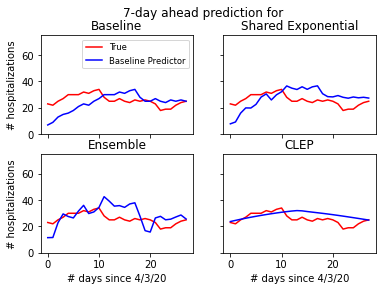

In [120]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)

axs[0, 0].plot(UCSF_data[start_day+k-1:],'r',label = "True")
axs[0, 0].plot(baseline_prediction,'b',label= "Baseline Predictor")
axs[0, 0].set_title('Baseline')
axs[0, 0].set_ylim([0, 75])
from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('small')
axs[0, 0].legend(prop=fontP)

axs[0, 1].plot(UCSF_data[start_day+k-1:],'r',label = "UCSF hospitalization data")
axs[0, 1].plot(shared_exp_future_predictions,'b',label= "Shared Exponential")
axs[0, 1].set_title('Shared Exponential')

axs[1, 0].plot(UCSF_data[start_day+k-1:],'r',label = "UCSF hospitalization data")
axs[1, 0].plot(ensemble,'b',label= "Ensemble")
axs[1, 0].set_title('Ensemble')

axs[1, 1].plot(UCSF_data[start_day+k-1:],'r',label = "UCSF hospitalization data")
axs[1, 1].plot(smoothed_ensemble,'b',label= "Smoothed CLEP")
axs[1, 1].set_title('CLEP')

for ax in axs.flat:
    ax.set(xlabel='# days since 4/3/20', ylabel='# hospitalizations')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

fig.suptitle(str(k)+"-day ahead prediction for")
#plt.savefig("UCSF_Hospitalizations_plots/combinedplot_"+str(k)+".jpg", dpi=150)

In [121]:
print(str(k) + "-day MAE for Baseline is:" + str(mean_absolute_error(baseline_prediction,UCSF_data[start_day+k-1:])))
print(str(k) + "-day MAE for Shared Exponentia is:" + str(mean_absolute_error(shared_exp_future_predictions,UCSF_data[start_day+k-1:])))
print(str(k) + "-day MAE for CLEP is:" + str(mean_absolute_error(ensemble,UCSF_data[start_day+k-1:])))
print(str(k) + "-day MAE for Smoothed CLEP is:" + str(mean_absolute_error(smoothed_ensemble,UCSF_data[start_day+k-1:])))


7-day MAE for Baseline is:6.892857142857143
7-day MAE for Shared Exponentia is:7.147222290870898
7-day MAE for CLEP is:6.495960912830403
7-day MAE for Smoothed CLEP is:3.9367541800213712
